# DeepCall

Step 1: Feature Extraction - after collection audio data, extract the features  
Step 2: Speaker Clustering - identify who is speaker 1 and who is speaker 2  
Step 3: Training - train your model to classify the data into: Speech, Laughter, Silence, Filler Words  
Step 4: User Study

In [54]:
import pandas as pd
import numpy as np
from pydub import AudioSegment
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import audioFeatureExtraction
from pyAudioAnalysis import audioSegmentation
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Wav-files contain channels. Choosing 1 channel prevents problems down the line.
def fixWavFile(filename):
    sound = AudioSegment.from_wav(filename)
    sound = sound.set_channels(1)
    sound.export(filename, format="wav")

# Create a dataframe with all the features + plot functionality
def extractFeatures(filename, plot = False):
    frame_size = 0.050
    frame_step = 0.025

    [Fs, x] = audioBasicIO.readAudioFile(filename);
    F, f_names = audioFeatureExtraction.stFeatureExtraction(x, Fs, frame_size*Fs, frame_step*Fs);
    dataframe = pd.DataFrame(data=F.reshape(F.shape[1], F.shape[0]), columns = f_names)
    
    if plot == True:
        for i in range(len(f_names)):
            plt.plot(F[i,:]); plt.xlabel('Frame no'); 
            plt.ylabel(f_names[i]);
            plt.show();
    return dataframe

# Classifies audio into 2 speakers + plot functionality
def speakerDiarization(filename, plot = False):
    speakers = audioSegmentation.speakerDiarization(filename, 2, plot_res=False)                                            
    dataframe=pd.DataFrame(speakers, columns=['category'])
    dataframe["seconds"] = np.linspace(0,dataframe.shape[0]/5,dataframe.shape[0])
    if plot == True:
        generatePlot(dataframe)

# Plot functionality for speakerDiarization
def generatePlot(dataframe):
    figure(num=None, figsize=(15, 3), dpi=80, facecolor='w', edgecolor='k')
    plt.style.use('ggplot')
    x = dataframe["seconds"]
    plt.xticks(np.arange(min(x), max(x)+1, 5.0))
    plt.xticks(rotation=90)
    plt.yticks([0, 1])
    plt.xlabel("Seconds")
    plt.ylabel("Speakers")
    plt.title("Speaker Diarization")
    plt.plot(dataframe["seconds"], dataframe["category"])
    plt.show()

# Speaker Diarization 

This algorithm allows us to know who is speaking in a conversation.

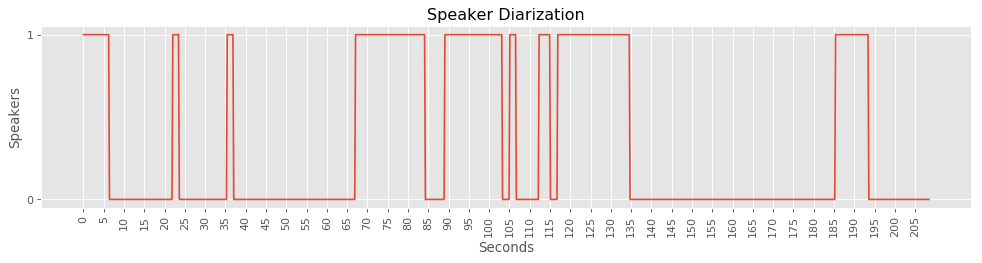

In [55]:
speakerDiarization("Sinclair.wav", plot = True)

# Feature Extraction 

A small dataset containing data on laughter and filler words.

In [65]:
laughter1 = extractFeatures("laughter1.wav")
laughter2 = extractFeatures("laughter2.wav")
laughters = pd.concat([laughter1, laughter2])
laughters["class"] = 0
filler1 = extractFeatures("filler1.wav")
filler2 = extractFeatures("filler2.wav")
fillers = pd.concat([filler1, filler2])
fillers["class"] = 1
data = pd.concat([laughters, fillers])
data = data.reset_index()

In [66]:
data

,index,zcr,energy,energy_entropy,spectral_centroid,spectral_spread,spectral_entropy,spectral_flux,spectral_rolloff,mfcc_1,...,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,chroma_12,chroma_std,class
0,0,0.121597,0.101633,0.083031,0.096642,0.099365,0.099819,0.104809,0.108893,0.112069,...,0.103902,0.086207,0.075318,0.080762,0.088475,0.098911,0.107985,0.114338,0.107985,0
1,1,0.105263,0.092559,0.080309,0.081670,0.097096,0.120236,0.128403,0.125681,0.116152,...,0.129310,0.130218,0.113430,0.086661,0.073049,0.075318,0.078494,0.076679,0.064428,0
2,2,0.058984,0.101180,0.139292,0.126588,0.110708,0.102995,0.091652,0.089383,0.089837,...,0.063067,0.063975,0.076679,0.090744,0.085753,0.072595,0.070327,0.070780,0.069873,0
3,3,0.071234,0.070780,0.068058,0.070780,0.076679,0.077586,0.071688,0.064428,0.073956,...,0.083485,0.065336,0.066243,0.073956,0.071234,0.068058,0.068966,0.062160,0.050363,0
4,4,0.059437,0.070780,0.066697,0.070327,0.084392,0.094374,0.098911,0.094374,0.078947,...,0.064428,0.078947,0.084846,0.078947,0.090290,0.099365,0.081216,0.061252,0.068966,0
5,5,0.075318,0.071234,0.077586,0.078947,0.071234,0.065789,0.071688,0.081216,0.074410,...,0.054900,0.080309,0.088475,0.091652,0.091198,0.092559,0.094374,0.097096,0.093013,0
6,6,0.084392,0.068966,0.062613,0.067151,0.064882,0.053993,0.041289,0.043103,0.054446,...,0.073049,0.072142,0.068966,0.068512,0.070780,0.073503,0.074410,0.071234,0.071234,0
7,7,0.072142,0.073049,0.074864,0.072142,0.078947,0.079401,0.072595,0.073956,0.070780,...,0.087114,0.090290,0.092559,0.078494,0.066243,0.069873,0.083938,0.096642,0.101633,0
8,8,0.110254,0.112523,0.110708,0.104809,0.088022,0.086661,0.082123,0.082123,0.101633,...,0.075771,0.078947,0.094828,0.114338,0.118875,0.132033,0.139292,0.111615,0.078494,0
9,9,0.071234,0.077132,0.080762,0.082123,0.077586,0.068966,0.068966,0.070327,0.068966,...,0.116152,0.107985,0.100272,0.086661,0.074410,0.078040,0.074410,0.068512,0.073049,0


# Machine Learning Classification

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.20, random_state=0)

dummy = DummyClassifier(random_state=0)
dummy.fit(X_train, y_train)
print("Dummy:", dummy.score(X_test, y_test))
    
#for i in [8, 9, 10, 11]:
clf = GradientBoostingClassifier(n_estimators=100, max_depth=8, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

target_names = ['laughter', 'filler']
print(classification_report(y_test, dummy.predict(X_test), target_names=target_names))

target_names = ['laughter', 'filler']
print(classification_report(y_test, clf.predict(X_test), target_names=target_names))


Dummy: 0.5118110236220472
0.9041994750656168
             precision    recall  f1-score   support

   laughter       0.52      0.49      0.51       384
     filler       0.51      0.53      0.52       378

avg / total       0.51      0.51      0.51       762

             precision    recall  f1-score   support

   laughter       0.90      0.91      0.91       384
     filler       0.91      0.90      0.90       378

avg / total       0.90      0.90      0.90       762

